In [7]:
library(ggplot2)
library(dplyr)
library(readr)

In [8]:
stack_data = read_csv(".\data\by_tag_year.csv")
head(stackData)

Parsed with column specification:
cols(
  year = col_double(),
  tag = col_character(),
  number = col_double(),
  year_total = col_double()
)


year,tag,number,year_total
2008,.htaccess,54,58390
2008,.net,5910,58390
2008,.net-2.0,289,58390
2008,.net-3.5,319,58390
2008,.net-4.0,6,58390
2008,.net-assembly,3,58390


In [10]:
stack_data_by_fraction <- mutate(stack_data, fraction = number/year_total)
head(stack_data_by_fraction)

year,tag,number,year_total,fraction
2008,.htaccess,54,58390,9.248159e-04
2008,.net,5910,58390,1.012160e-01
2008,.net-2.0,289,58390,4.949478e-03
2008,.net-3.5,319,58390,5.463264e-03
2008,.net-4.0,6,58390,1.027573e-04
2008,.net-assembly,3,58390,5.137866e-05


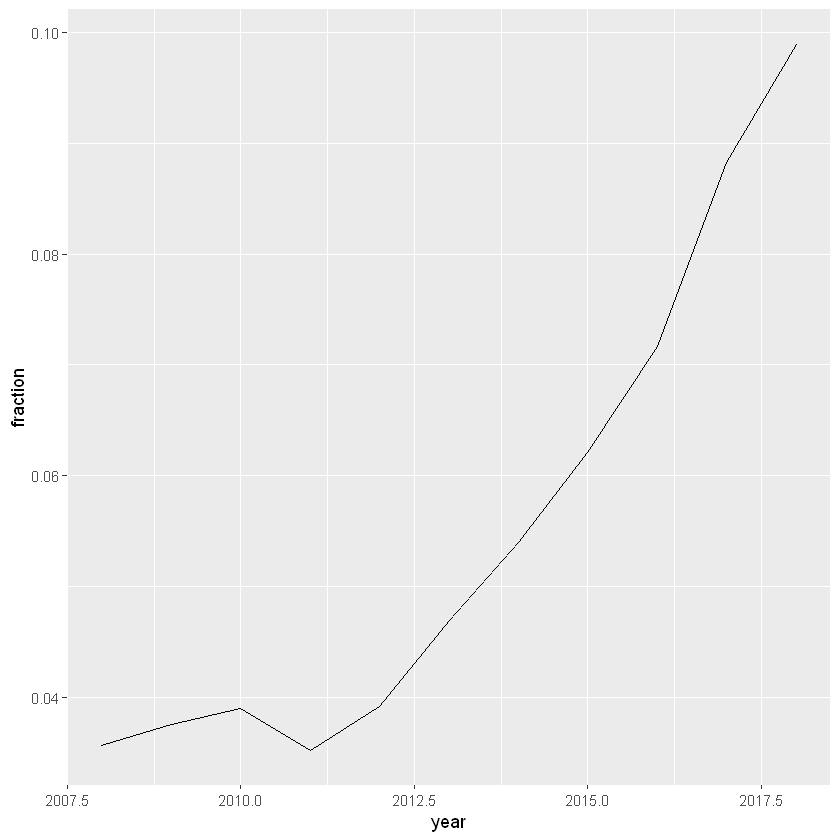

In [11]:
python_over_time <- filter(stack_data_by_fraction, tag=="python")
ggplot(data=python_over_time, aes(x=year, y=fraction)) + geom_line()

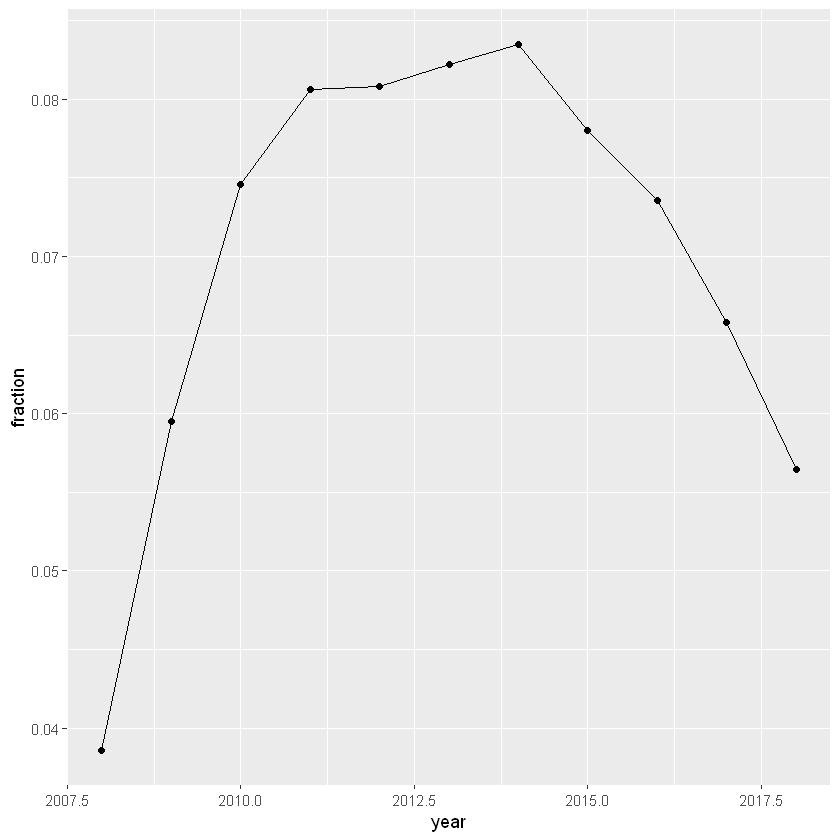

In [14]:
php_over_time <- filter(stack_data_by_fraction, tag=='php')
ggplot(data=php_over_time, aes(x=year, y=fraction)) + geom_point() + geom_line()

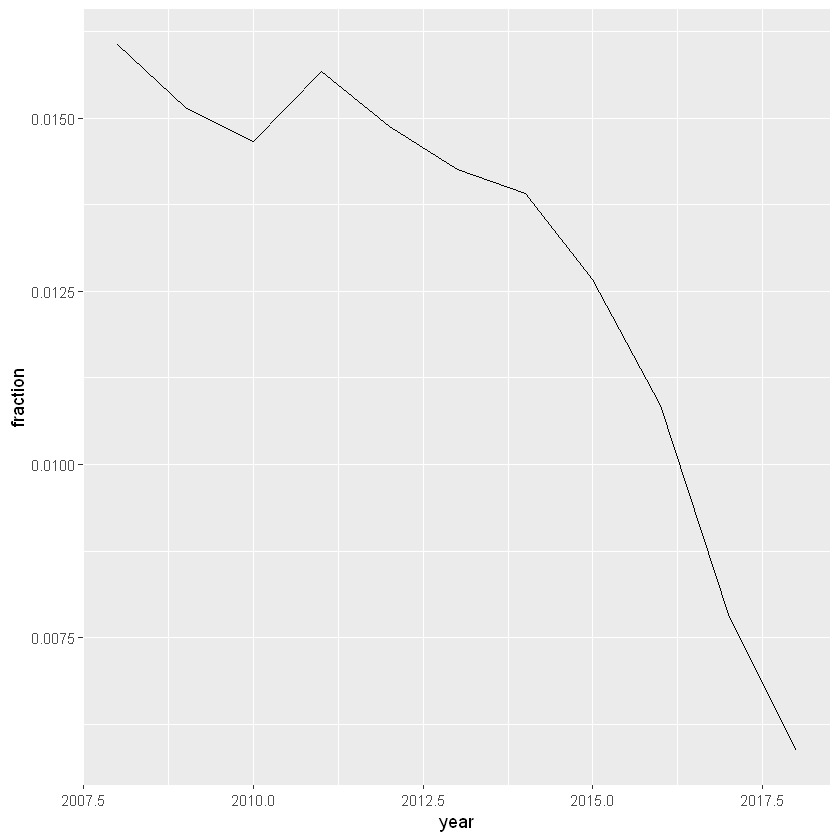

In [16]:
ruby_over_time <- filter(stack_data_by_fraction, tag=='ruby')
ggplot(data=ruby_over_time, aes(x=year, y=fraction)) + geom_line()

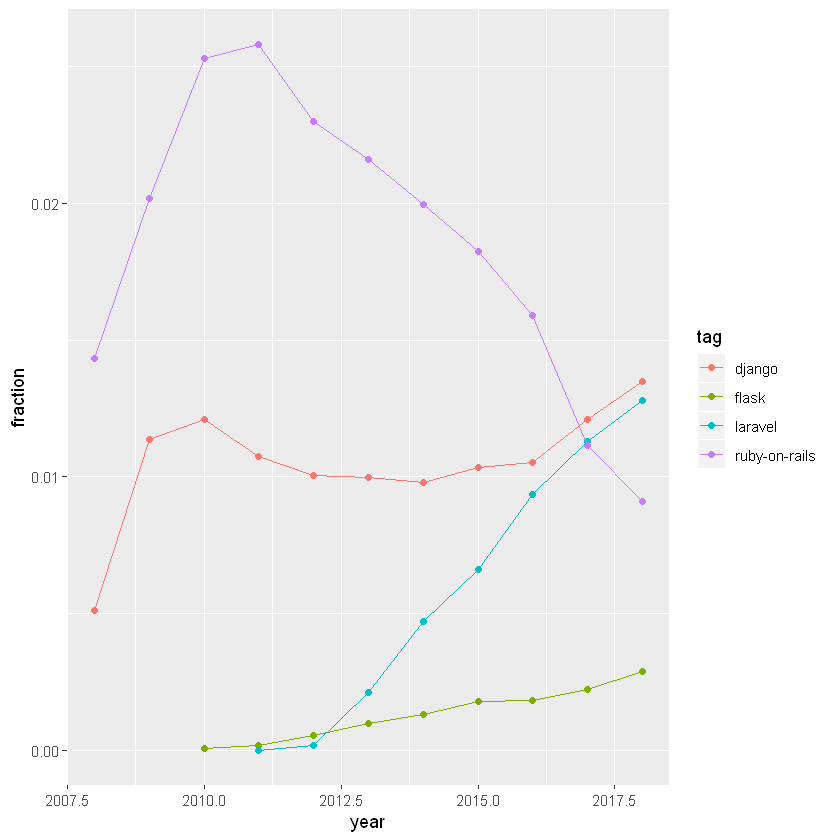

In [18]:
web_framework_tags <- c("laravel", "django", "flask", "ruby-on-rails")
web_frameworks_over_time <- stack_data_by_fraction %>%
                                filter(tag %in% web_framework_tags)
ggplot(data=web_frameworks_over_time, aes(x=year, y=fraction, color=tag)) + geom_point() + geom_line()

In [20]:
sorted_tags <- stack_data %>%
                group_by(tag) %>%
                summarise(total=sum(number)) %>%
                arrange(desc(total))
head(sorted_tags, 15)
tail(sorted_tags, 15)

tag,total
javascript,1632049
java,1425961
c#,1217450
php,1204291
android,1110261
python,970768
jquery,915159
html,755341
c++,574263
ios,566075


tag,total
playframework-2.1,1006
cakephp-2.1,1005
device-driver,1005
jasperserver,1004
webdeploy,1004
cat,1003
date-formatting,1003
java-2d,1003
lattice,1003
directory-structure,1002


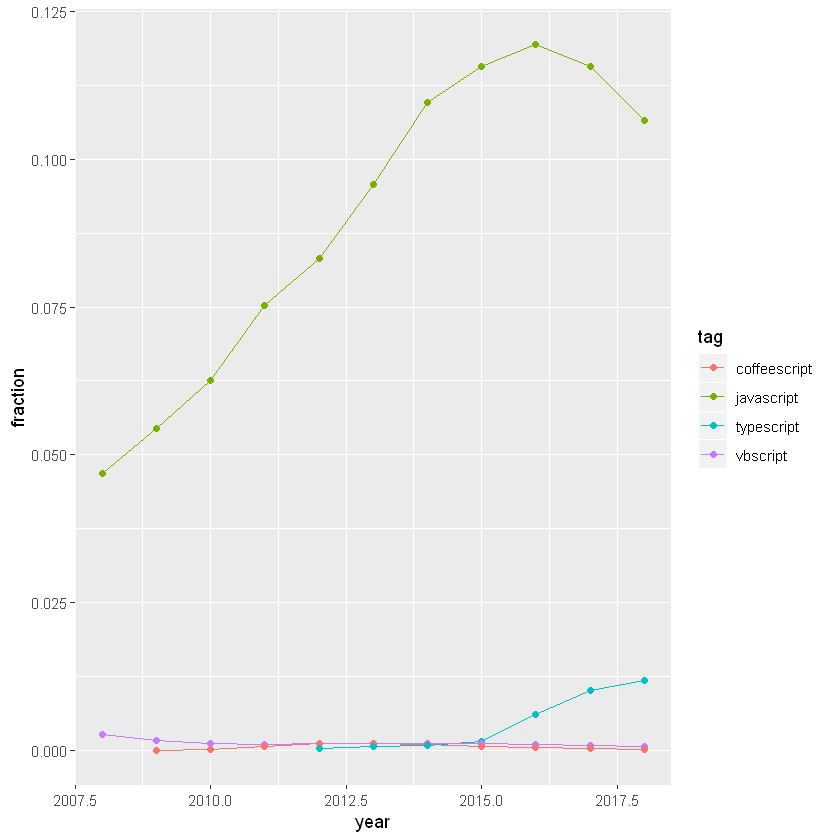

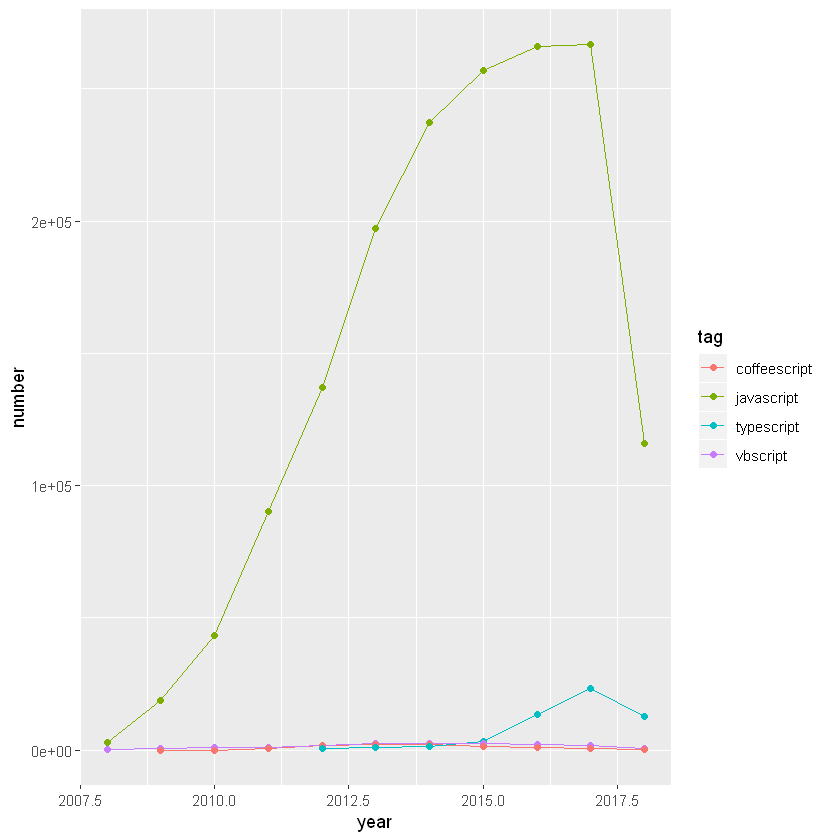

In [24]:
script_tags = c("javascript", "typescript", "coffeescript", "vbscript")
scripts_over_time = stack_data_by_fraction %>%
                        filter(tag %in% script_tags) %>%
                        arrange(desc(number))
ggplot(data=scripts_over_time, aes(x=year, y=fraction, color=tag)) + geom_line() + geom_point()
ggplot(data=scripts_over_time, aes(x=year, y=number, color=tag)) + geom_line() + geom_point()

year,tag,number,year_total,fraction
2017,javascript,266762,2305207,0.11572149
2016,javascript,265896,2226072,0.11944627
2015,javascript,257006,2219527,0.11579314
2014,javascript,237415,2164701,0.10967565
2014,java,218917,2164701,0.10113036
2015,java,216738,2219527,0.09765054
2017,python,203522,2305207,0.08828795
2016,java,198559,2226072,0.08919703
2013,javascript,197101,2060473,0.09565813
2013,java,192187,2060473,0.09327324


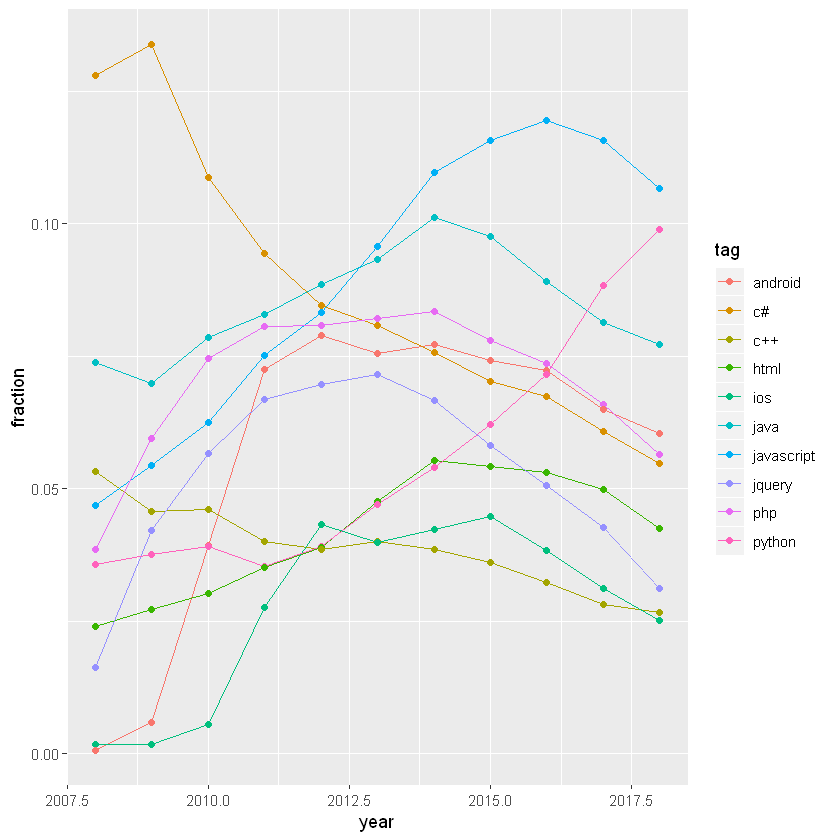

In [33]:
highest_tags <- head(sorted_tags$tag, 10)
highest_tags_over_time <-stack_data_by_fraction %>%
                            group_by(tag) %>%
                            filter(tag %in% highest_tags) %>%
                            arrange(desc(number))
head(highest_tags_over_time, 10)
ggplot(data=highest_tags_over_time, aes(x=year, y=fraction, color=tag)) + geom_line() + geom_point()

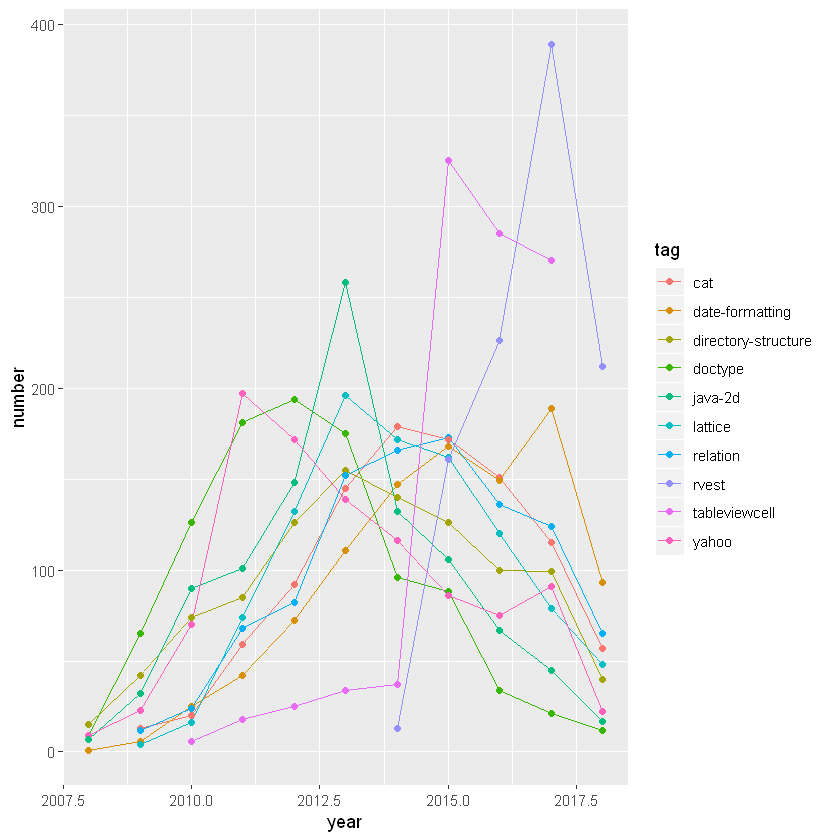

In [35]:
lowest_tags <- tail(sorted_tags$tag, 10)
lowest_tags_over_time <- stack_data_by_fraction %>%
                            group_by(year) %>%
                            filter(tag %in% lowest_tags) %>%
                            arrange(desc(number))
ggplot(data=lowest_tags_over_time, aes(x=year, y=number, color=tag)) + geom_line() + geom_point()